## EX 3번 회귀 모델

In [ ]:
import pandas as pd
# 판다스
from sklearn.model_selection import train_test_split
# 타겟이랑 피쳐스를 분리하는 라이브러리
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# 데이터 정규화, 인코더, 스케일러
from sklearn.compose import ColumnTransformer
# Q1: 다양한 전처리 한번에 적용
from sklearn.pipeline import Pipeline
# 파이프라인: 머신러닝 플로우를 하나의 연결된 시퀀스로 묶음
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# 회귀 모델
from sklearn.tree import DecisionTreeRegressor
# 회귀 모델
from sklearn.ensemble import RandomForestRegressor
# 회귀 모델
from sklearn.metrics import mean_squared_error, r2_score
# 평가 지표
import numpy as np
# 초코파이

In [ ]:
# 데이터 전처리 (EX-3)
data3 = pd.read_csv('data/diamonds.csv', encoding='cp949', low_memory=False)

print(f'원본 데이터 수: {len(data3)}')
print(data3.describe())

data3_fixed = data3.copy()  # 원본 보존

# IQR로 이상치 제거 (carat 컬럼)
Q1 = data3['carat'].quantile(0.25)
Q3 = data3['carat'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data3_fixed = data3_fixed[(data3_fixed['carat'] >= lower_bound) & (data3_fixed['carat'] <= upper_bound)]

print(f'하한값: {lower_bound:.2f} / 상한값: {upper_bound:.2f}')
print(f'이상치 제거 후 데이터 수: {len(data3_fixed)}')
print(data3_fixed.describe())


원본 데이터 수: 53940
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000   

In [ ]:
# Features와 Target 분리
# 'price'가 예측하려는 타겟 변수
X = data3_fixed.drop('price', axis=1)
y = data3_fixed['price']

In [ ]:
# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 전처리 파이프라인 구성
# 수치형 특성과 범주형 특성 정의
numeric_features = ['carat', 'depth', 'table', 'x', 'y', 'z']   # 수치형 특성
categorical_features = ['cut', 'color', 'clarity']  # 범주형 특성


# ColumnTransformer를 사용하여 다른 유형의 특성에 다른 전처리 적용
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # 수치형 특성 스케일링
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # 범주형 특성 원-핫 인코딩
    ])

In [ ]:
# 모델 정의 및 평가 함수
def train_and_evaluate_model(model, model_name):
    # 파이프라인 생성 (전처리 + 모델)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               (model_name, model)])

    # 모델 학습
    pipeline.fit(X_train, y_train)

    # 예측
    y_pred = pipeline.predict(X_test)

    # 평가
    # rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    # 결정 계수
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.4f}")
    return pipeline # 학습된 파이프라인 반환

In [ ]:
# 각 모델 구현 및 평가

# Linear Regression
linear_model = train_and_evaluate_model(LinearRegression(), 'LinearRegression')

# Ridge Regression
# alpha 값은 정규화 강도를 조절. 기본값은 1.0
ridge_model = train_and_evaluate_model(Ridge(alpha=1.0), 'Ridge')

# Lasso Regression
# alpha 값은 정규화 강도를 조절. 기본값은 1.0
lasso_model = train_and_evaluate_model(Lasso(alpha=0.1, max_iter=10000), 'Lasso')
# Lasso는 경우에 따라 수렴하지 않을 수 있어 max_iter를 늘려줄 수 있습니다.

# Decision Tree Regressor
# random_state를 고정하여 결과 재현성 확보
dt_model = train_and_evaluate_model(DecisionTreeRegressor(random_state=42), 'DecisionTree')

# Random Forest Regressor
# n_estimators는 트리의 개수, random_state는 재현성
rf_model = train_and_evaluate_model(RandomForestRegressor(n_estimators=100, random_state=42), 'RandomForest')


--- LinearRegression ---
RMSE: 1010.27
R-squared: 0.9112

--- Ridge ---
RMSE: 1010.19
R-squared: 0.9112

--- Lasso ---
RMSE: 1010.16
R-squared: 0.9112

--- DecisionTree ---
RMSE: 619.46
R-squared: 0.9666

--- RandomForest ---
RMSE: 462.93
R-squared: 0.9814


## EX 5번 회귀 모델

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# EX-5 데이터 전처리

data5 = pd.read_csv('data/winequality-red.csv', encoding='cp949', low_memory=False)

print(f'원본 데이터 수: {len(data5)}')
print(data5.describe())

data5_fixed = data5.copy()    # 원본 보존

print('\n결측값 확인: \n', data5_fixed.isnull().sum())

# 스케일 대상 정의
columns_to_scale = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides'
]


# 스케일러 정의
# StandardScaler는 평균을 0, 표준편차를 1로 만들어 데이터 표준화
s = StandardScaler()
data5_fixed[columns_to_scale] = s.fit_transform(data5_fixed[columns_to_scale])

print(data5_fixed.head())


print(data5_fixed[columns_to_scale].describe())

원본 데이터 수: 1599
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.

In [3]:
# Features와 Target 변수 분리
X = data5_fixed.drop('quality', axis=1)
y = data5_fixed['quality']

In [4]:
# 학습 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# 모델 정의 및 학습/평가/시각화 함수
def train_evaluate_and_visualize_model(model, model_name):
    # 파이프라인에서 전처리 단계 제거, 모델만 직접 연결
    # X_train, X_test는 이미 스케일링되어 있으므로, 모델에 바로 fit
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 평가
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # 시각화
    plt.figure(figsize=(14, 6))

    # 1. 실제 값 vs. 예측 값 산점도
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    # y의 전체 범위 사용을 위해 y_train과 y_test를 합쳐서 min/max 계산
    y_full_range_min = min(y_train.min(), y_test.min())
    y_full_range_max = max(y_train.max(), y_test.max())
    plt.plot([y_full_range_min, y_full_range_max], [y_full_range_min, y_full_range_max], 'r--', lw=2)
    plt.title(f'{model_name}: Actual vs. Predicted Quality')
    plt.xlabel('Actual Quality')
    plt.ylabel('Predicted Quality')
    plt.grid(True, linestyle='--', alpha=0.7)

    # 2. 잔차 분포 히스토그램
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred
    sns.histplot(residuals, bins=20, kde=True)
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f'{model_name}: Residuals Distribution')
    plt.xlabel('Residuals (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    return model # 학습된 모델 반환


--- LinearRegression ---
RMSE: 0.6245
R-squared: 0.4032


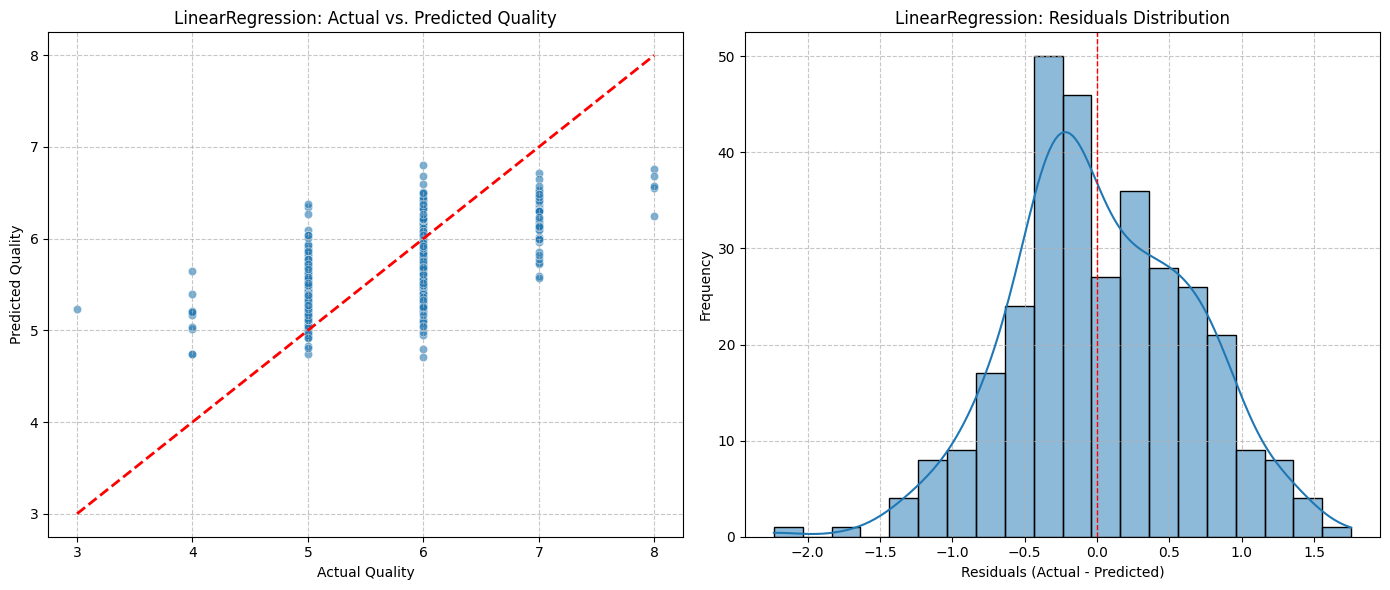


--- Ridge ---
RMSE: 0.6254
R-squared: 0.4014


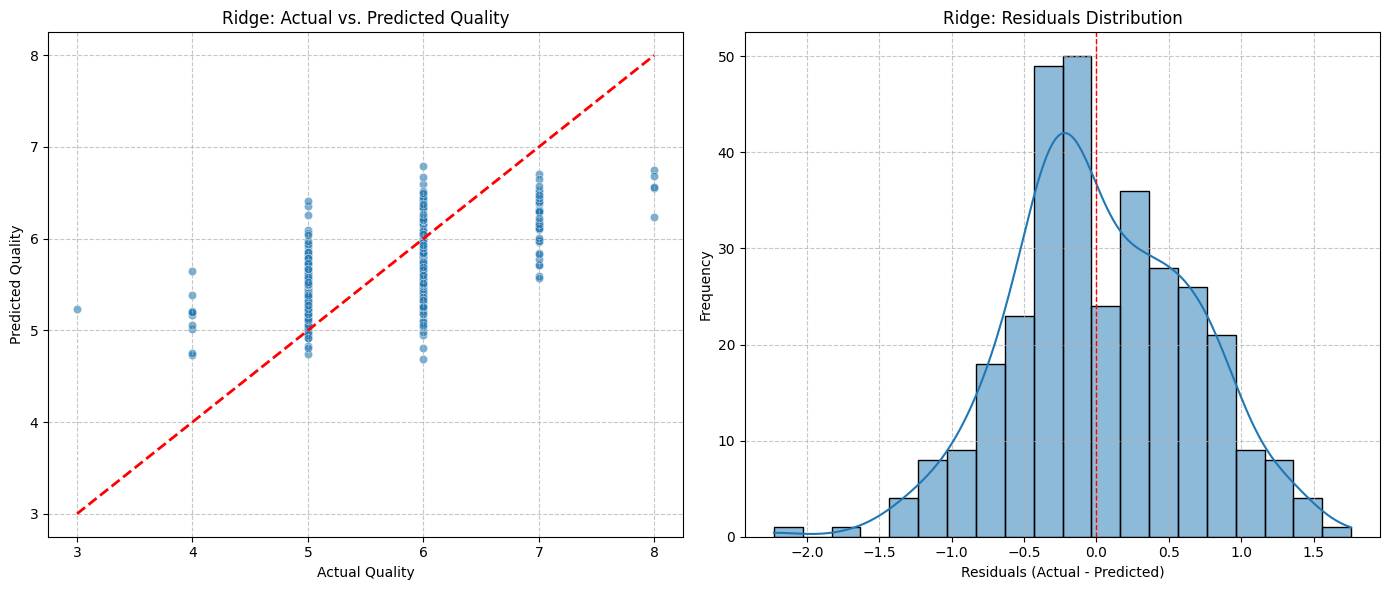


--- Lasso ---
RMSE: 0.6367
R-squared: 0.3797


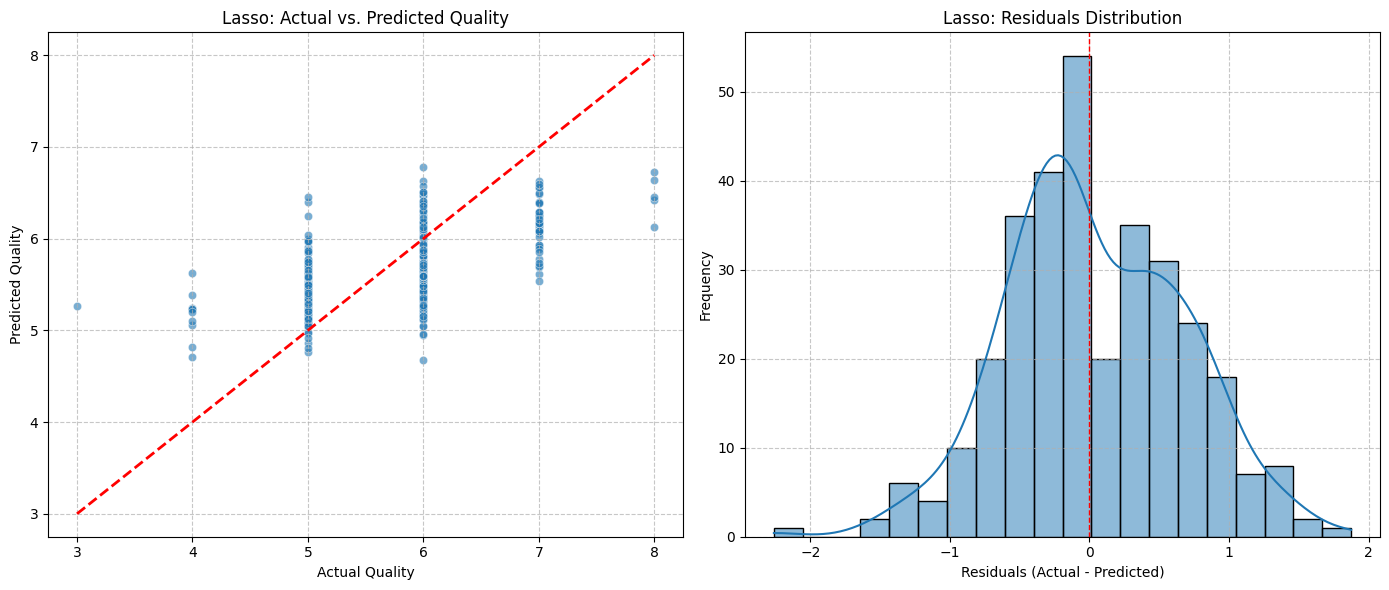


--- DecisionTree ---
RMSE: 0.7886
R-squared: 0.0484


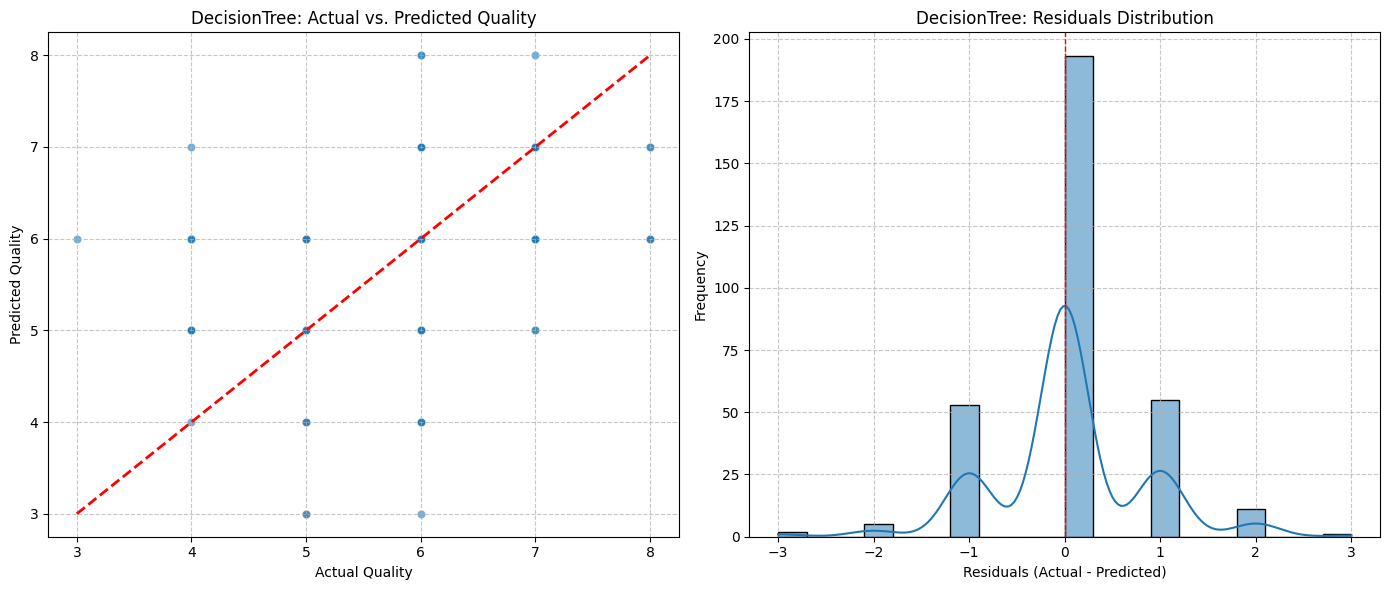


--- RandomForest ---
RMSE: 0.5490
R-squared: 0.5387


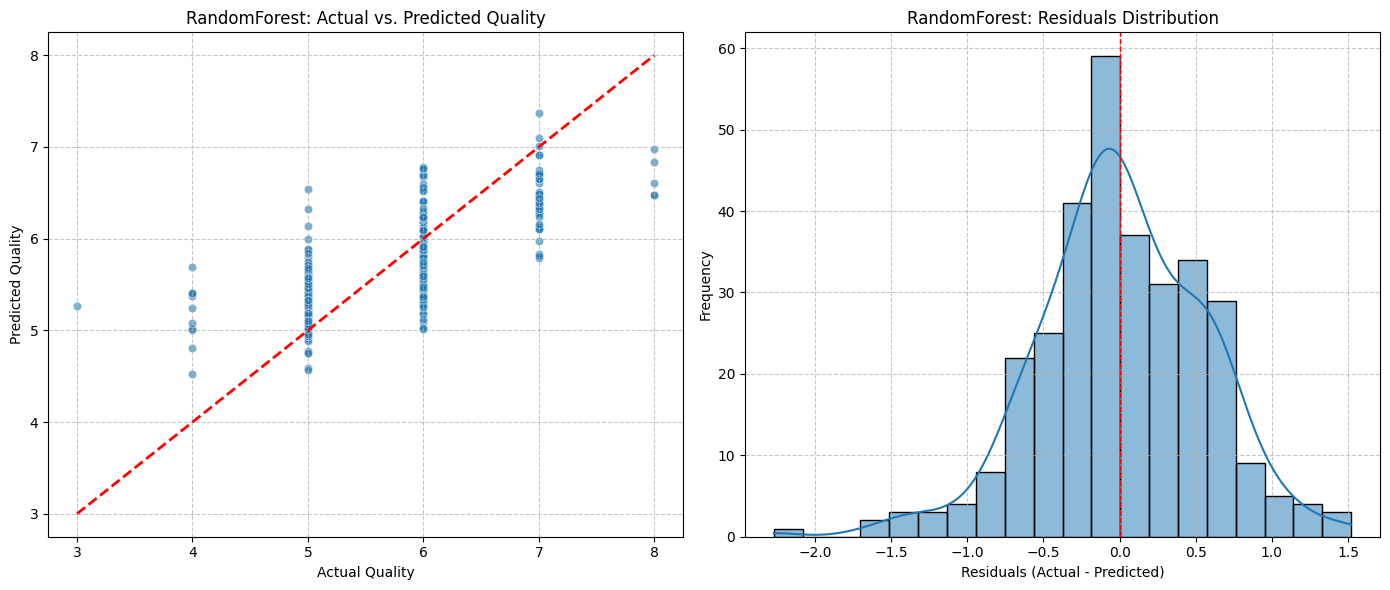


--- SVR ---
RMSE: 0.6947
R-squared: 0.2614


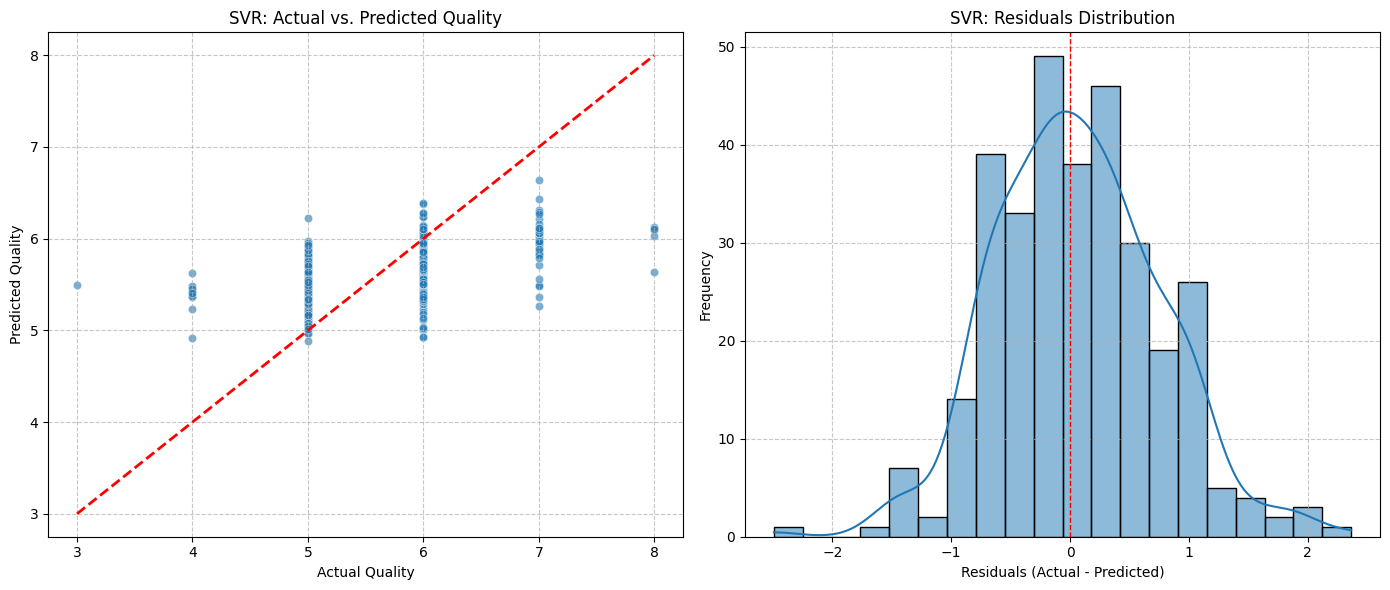

In [6]:
# Linear Regression
linear_model = train_evaluate_and_visualize_model(LinearRegression(), 'LinearRegression')

# Ridge Regression
ridge_model = train_evaluate_and_visualize_model(Ridge(alpha=1.0), 'Ridge')

# Lasso Regression
lasso_model = train_evaluate_and_visualize_model(Lasso(alpha=0.01, max_iter=10000), 'Lasso')

# Decision Tree Regressor
dt_model = train_evaluate_and_visualize_model(DecisionTreeRegressor(random_state=42), 'DecisionTree')

# Random Forest Regressor
rf_model = train_evaluate_and_visualize_model(RandomForestRegressor(n_estimators=100, random_state=42), 'RandomForest')

# SVR
svr_model = train_evaluate_and_visualize_model(SVR(kernel='rbf', C=1.0, epsilon=0.1), 'SVR')